In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install python-igraph

Note: you may need to restart the kernel to use updated packages.


In [3]:
from igraph import Graph
file_path3 = "/kaggle/input/social-computing/sem3.gml"
file_path5='/kaggle/input/social-computing/sem5.gml'
file_path7='/kaggle/input/social-computing/sem7.gml'
graph3 = Graph.Read_GML(file_path3)
graph5=Graph.Read_GML(file_path5)
graph7=Graph.Read_GML(file_path7)

In [4]:
# print(graph3.vs[119].attributes())
print(graph5.vs[0].attributes())
# print(graph7.vs[0].attributes())

{'id': 0.0, 'name': '1', 'Gender': 'male', 'LateralEntry': 0.0, 'Backlog': 0.0, 'ProjectPartner3rdSem': '32 8', 'ProjectPartner4thSem': 8.0, 'PCP': 7.0, 'TFCS': 7.0, 'DMS': 0.0, 'DS': 8.0, 'Maths1CIE': 39.0, 'Maths1SEE': 68.0, 'Maths1Final': 73.0, 'ChemCIE': 38.0, 'ChemSEE': 59.0, 'ChemFinal': 68.0, 'BEECIE': 42.0, 'BEESEE': 40.0, 'BEEFinal': 62.0, 'EEDCIE': 38.0, 'EEDSEE': 73.0, 'EEDFinal': 75.0, 'ENMCIE': 45.0, 'ENMSEE': 64.0, 'ENMFinal': 77.0, 'Colab2CIE': 42.0, 'Colab2SEE': 45.0, 'Colab2Final': 65.0, 'EYSCIE': 41.0, 'EYSSEE': 71.0, 'EYSFinal': 77.0, 'CIPCIE': 36.0, 'CIPSEE': 73.0, 'CIPFinal': 73.0, 'X1stSemPercentage': 71.0, 'Maths2CIE': 38.0, 'Maths2SEE': 68.0, 'Maths2Final': 72.0, 'PHYCIE': 40.0, 'PHYSEE': 68.0, 'PHYFinal': 74.0, 'EEECIE': 37.0, 'EEESEE': 45.0, 'EEEFinal': 60.0, 'EMECIE': 39.0, 'EMESEE': 49.0, 'EMEFinal': 64.0, 'CCPCIE': 43.0, 'CCPSEE': 51.0, 'CCPFinal': 69.0, 'Colab1CIE': 45.0, 'Colab1SEE': 44.0, 'Colab1Final': 67.0, 'BIECIE': 30.0, 'BIESEE': 64.0, 'BIEFinal': 6

In [ ]:
sem5_data = pd.DataFrame(columns=["Node ID",'gender','ProjectPartner3rdSem',"ProjectPartner4thSem" ,"freinds", "X1stSemPercentage", "X2ndSemPercentage", "X3rdSemPercentage",'X4thSemPercentage','backlogs','friend_count','lateral_entry'])


for node_index in range(graph5.vcount()):
  
    friends = graph5.neighbors(node_index)
    friend_count= graph5.degree(node_index)
  
    node_attributes = graph5.vs[node_index].attributes()
    ProjectPartner3rdSem=node_attributes.get('ProjectPartner3rdSem')
    ProjectPartner4thSem=node_attributes.get('ProjectPartner4thSem')
 
    gender = node_attributes.get("Gender")
    x4th_sem_percentage = node_attributes.get("X4thSemPercentage")
    x1st_sem_percentage = node_attributes.get("X1stSemPercentage")
    x2nd_sem_percentage = node_attributes.get("X2ndSemPercentage")
    x3rd_sem_percentage = node_attributes.get("X3rdSemPercentage")
    
    backlog=node_attributes.get('Backlog')
    lateral_entry=node_attributes.get('LateralEntry')

   
    sem5_data = sem5_data.append({"Node ID": node_index, "freinds": friends,'backlogs':backlog,'lateral_entry':lateral_entry,
                    'friend_count':friend_count,'gender':gender,'ProjectPartner3rdSem':ProjectPartner3rdSem,"ProjectPartner4thSem":ProjectPartner4thSem,
                    'X4thSemPercentage': x4th_sem_percentage,
                    "X1stSemPercentage": x1st_sem_percentage, "X2ndSemPercentage": x2nd_sem_percentage,
                    "X3rdSemPercentage": x3rd_sem_percentage}, ignore_index=True)

In [6]:
sem5_data.head()

,Node ID,gender,ProjectPartner3rdSem,ProjectPartner4thSem,freinds,X1stSemPercentage,X2ndSemPercentage,X3rdSemPercentage,X4thSemPercentage,backlogs,friend_count,lateral_entry
0,0,male,32 8,8.0,"[6, 6, 7, 7, 28, 28, 39, 39, 82]",71.0,67.0,78.0,80.0,0.0,9,0.0
1,1,female,9 13,38.0,"[8, 8, 12, 12, 37, 37, 40, 40]",82.0,81.0,85.0,87.0,0.0,8,0.0
2,2,female,42 45,45.0,"[41, 41, 43, 43]",55.0,66.0,66.0,60.0,0.0,4,0.0
3,3,male,0,27.0,"[19, 19, 26, 41, 45, 45, 48, 48, 49, 49, 51, 6...",68.0,76.0,78.0,67.0,0.0,15,0.0
4,4,male,51 19,0.0,"[5, 5, 11, 11, 18, 18, 22, 22, 28, 34, 34, 70,...",46.0,54.0,50.0,52.0,0.0,13,0.0


In [ ]:
sem7_data = pd.DataFrame(columns=["Node ID",'gender','locality' ,"freinds", "X1stSemPercentage", "X2ndSemPercentage", "X3rdSemPercentage",'X4thSemPercentage','backlogs','friend_count','lateral_entry'])


for node_index in range(graph7.vcount()):
 
    friends = graph7.neighbors(node_index)
    friend_count= graph7.degree(node_index)
  
    node_attributes = graph7.vs[node_index].attributes()
    locality=node_attributes.get('Locality')
  
    gender = node_attributes.get("Gender")
    x4th_sem_percentage = node_attributes.get("X4thSemPercentage")
    x1st_sem_percentage = node_attributes.get("X1stSemPercentage")
    x2nd_sem_percentage = node_attributes.get("X2ndSemPercentage")
    x3rd_sem_percentage = node_attributes.get("X3rdSemPercentage")
    
    backlog=node_attributes.get('Backlog')
    lateral_entry=node_attributes.get('LateralEntry')

    
    sem7_data = sem7_data.append({"Node ID": node_index, "freinds": friends,'backlogs':backlog,'lateral_entry':lateral_entry,
                    'friend_count':friend_count,'gender':gender,'locality':locality,'X4thSemPercentage': x4th_sem_percentage,
                    "X1stSemPercentage": x1st_sem_percentage, "X2ndSemPercentage": x2nd_sem_percentage,
                    "X3rdSemPercentage": x3rd_sem_percentage}, ignore_index=True)

In [8]:
sem7_data.head()

,Node ID,gender,locality,freinds,X1stSemPercentage,X2ndSemPercentage,X3rdSemPercentage,X4thSemPercentage,backlogs,friend_count,lateral_entry
0,0,male,KA,"[6, 6, 7, 7, 28, 28, 39, 39]",71.0,67.0,78.0,80.0,0.0,8,0.0
1,1,female,L,"[2, 8, 8, 12, 12, 25, 25, 30, 40, 40, 44, 44, 48]",82.0,81.0,85.0,87.0,0.0,13,0.0
2,2,female,N,"[1, 12, 12, 30, 38, 45, 49]",55.0,66.0,66.0,60.0,0.0,7,0.0
3,3,male,L,"[19, 19, 26, 41, 45, 49, 82, 121, 121]",68.0,76.0,78.0,67.0,0.0,9,0.0
4,4,male,N,"[5, 18, 18, 22, 22, 28, 34, 34]",46.0,54.0,50.0,52.0,0.0,8,0.0


In [ ]:
sem3_data = pd.DataFrame(columns=["Node ID", "freinds", "X1stSemPercentage", "X2ndSemPercentage", "X3rdSemPercentage",'backlogs','friend_count','lateral_entry'])


for node_index in range(graph3.vcount()):
 
    friends = graph3.neighbors(node_index)
    friend_count= graph3.degree(node_index)
   
    node_attributes = graph3.vs[node_index].attributes()


    gender = node_attributes.get("Gender")
    x4th_sem_percentage = node_attributes.get("X4thSemPercentage")
    x1st_sem_percentage = node_attributes.get("X1stSemPercentage")
    x2nd_sem_percentage = node_attributes.get("X2ndSemPercentage")
    x3rd_sem_percentage = node_attributes.get("X3rdSemPercentage")
    backlog=node_attributes.get('Backlog')
    lateral_entry=node_attributes.get('LateralEntry')

  
    sem3_data = sem3_data.append({"Node ID": node_index, "freinds": friends,'backlogs':backlog,'lateral_entry':lateral_entry,
                    'friend_count':friend_count,
                    "X1stSemPercentage": x1st_sem_percentage, "X2ndSemPercentage": x2nd_sem_percentage,
                    "X3rdSemPercentage": x3rd_sem_percentage}, ignore_index=True)

In [10]:
sem3_data.head()

,Node ID,freinds,X1stSemPercentage,X2ndSemPercentage,X3rdSemPercentage,backlogs,friend_count,lateral_entry
0,0,"[6, 6, 7, 7, 28, 28, 39, 39, 82]",71.0,67.0,78.0,0.0,9,0.0
1,1,"[8, 8, 12, 12, 37, 37, 40, 40]",82.0,81.0,85.0,0.0,8,0.0
2,2,"[41, 41, 43, 43]",55.0,66.0,66.0,0.0,4,0.0
3,3,"[19, 19, 26, 41, 45, 45, 48, 48, 49, 49, 51, 6...",68.0,76.0,78.0,0.0,15,0.0
4,4,"[5, 5, 11, 11, 18, 18, 22, 22, 28, 34, 34, 70,...",46.0,54.0,50.0,0.0,13,0.0


In [11]:
merged_data = sem3_data.merge(sem5_data, on="Node ID", suffixes=("_sem3", "_sem5")).merge(sem7_data, on="Node ID", suffixes=("", "_sem7"))

In [12]:
friendship_evolution = merged_data[["Node ID", "freinds_sem3", "freinds_sem5", "freinds"]]
friendship_evolution["New Friends in sem5"] = friendship_evolution.apply(lambda row: set(row["freinds_sem5"]) - set(row["freinds_sem3"]), axis=1)
friendship_evolution["Lost Friends in sem5"] = friendship_evolution.apply(lambda row: set(row["freinds_sem3"]) - set(row["freinds_sem5"]), axis=1)

/tmp/ipykernel_34/1628969078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  friendship_evolution["New Friends in sem5"] = friendship_evolution.apply(lambda row: set(row["freinds_sem5"]) - set(row["freinds_sem3"]), axis=1)
/tmp/ipykernel_34/1628969078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  friendship_evolution["Lost Friends in sem5"] = friendship_evolution.apply(lambda row: set(row["freinds_sem3"]) - set(row["freinds_sem5"]), axis=1)


In [13]:
friendship_evolution.head()

,Node ID,freinds_sem3,freinds_sem5,freinds,New Friends in sem5,Lost Friends in sem5
0,0,"[6, 6, 7, 7, 28, 28, 39, 39, 82]","[6, 6, 7, 7, 28, 28, 39, 39, 82]","[6, 6, 7, 7, 28, 28, 39, 39]",{},{}
1,1,"[8, 8, 12, 12, 37, 37, 40, 40]","[8, 8, 12, 12, 37, 37, 40, 40]","[2, 8, 8, 12, 12, 25, 25, 30, 40, 40, 44, 44, 48]",{},{}
2,2,"[41, 41, 43, 43]","[41, 41, 43, 43]","[1, 12, 12, 30, 38, 45, 49]",{},{}
3,3,"[19, 19, 26, 41, 45, 45, 48, 48, 49, 49, 51, 6...","[19, 19, 26, 41, 45, 45, 48, 48, 49, 49, 51, 6...","[19, 19, 26, 41, 45, 49, 82, 121, 121]",{},{}
4,4,"[5, 5, 11, 11, 18, 18, 22, 22, 28, 34, 34, 70,...","[5, 5, 11, 11, 18, 18, 22, 22, 28, 34, 34, 70,...","[5, 18, 18, 22, 22, 28, 34, 34]",{},{}


In [14]:
relationships = merged_data[["Node ID", "gender", "X1stSemPercentage", "X2ndSemPercentage", "X3rdSemPercentage", "X4thSemPercentage", "backlogs"]]

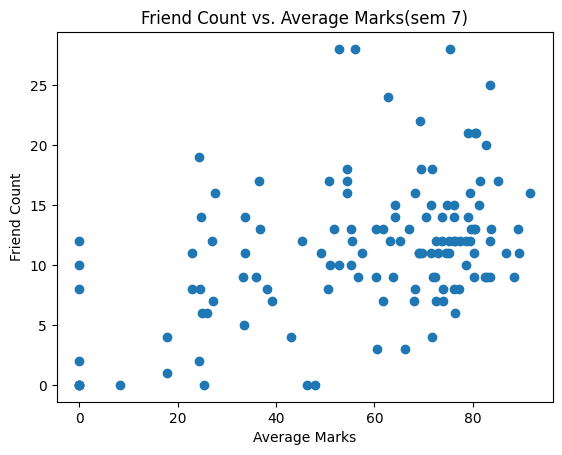

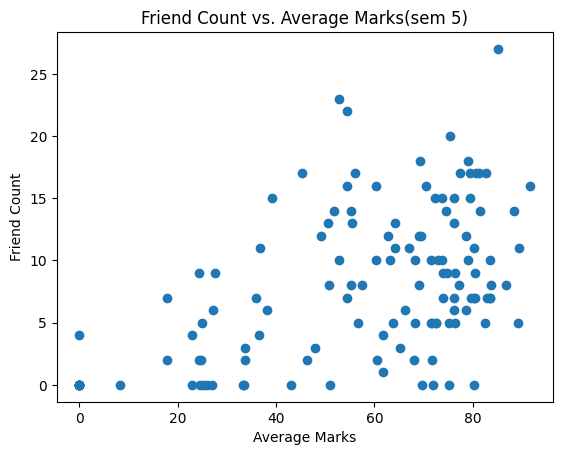

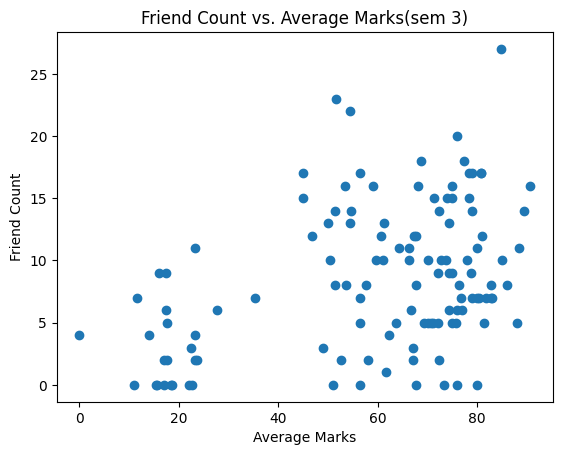

In [16]:
import matplotlib.pyplot as plt
avg_marks = sem7_data[['X1stSemPercentage', 'X2ndSemPercentage', 'X3rdSemPercentage', 'X4thSemPercentage']].mean(axis=1)
friend_counts = sem7_data['friend_count']


plt.scatter(avg_marks, friend_counts)
plt.xlabel("Average Marks")
plt.ylabel("Friend Count")
plt.title("Friend Count vs. Average Marks(sem 7)")
plt.show()



avg_marks = sem5_data[['X1stSemPercentage', 'X2ndSemPercentage', 'X3rdSemPercentage', 'X4thSemPercentage']].mean(axis=1)
friend_counts = sem5_data['friend_count']


plt.scatter(avg_marks, friend_counts)
plt.xlabel("Average Marks")
plt.ylabel("Friend Count")
plt.title("Friend Count vs. Average Marks(sem 5)")
plt.show()




avg_marks = sem3_data[['X1stSemPercentage', 'X2ndSemPercentage', 'X3rdSemPercentage']].mean(axis=1)
friend_counts = sem3_data['friend_count']


plt.scatter(avg_marks, friend_counts)
plt.xlabel("Average Marks")
plt.ylabel("Friend Count")
plt.title("Friend Count vs. Average Marks(sem 3)")
plt.show()

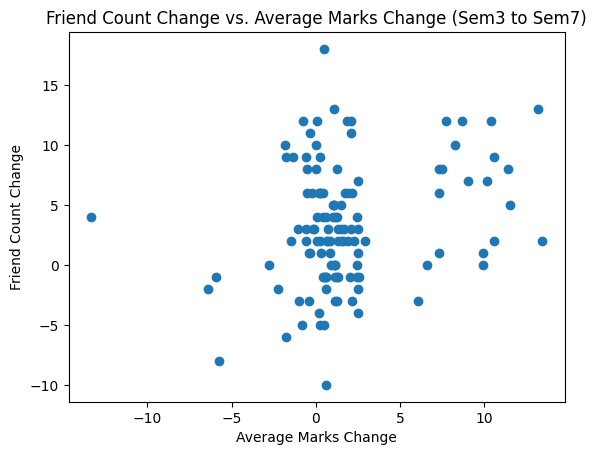

In [17]:

avg_marks_change = sem7_data[['X1stSemPercentage', 'X2ndSemPercentage', 'X3rdSemPercentage', 'X4thSemPercentage']].mean(axis=1) - sem3_data[['X1stSemPercentage', 'X2ndSemPercentage', 'X3rdSemPercentage']].mean(axis=1)
friend_count_change = sem7_data['friend_count'] - sem3_data['friend_count']


plt.scatter(avg_marks_change, friend_count_change)
plt.xlabel("Average Marks Change")
plt.ylabel("Friend Count Change")
plt.title("Friend Count Change vs. Average Marks Change (Sem3 to Sem7)")
plt.show()

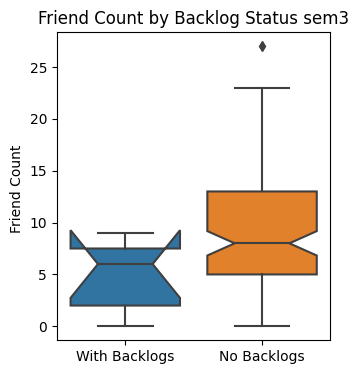

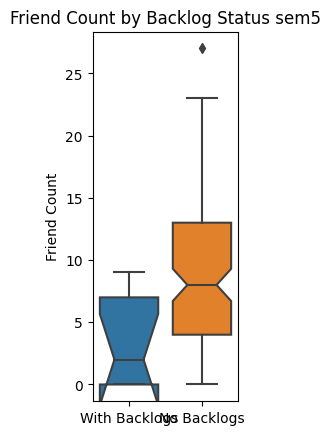

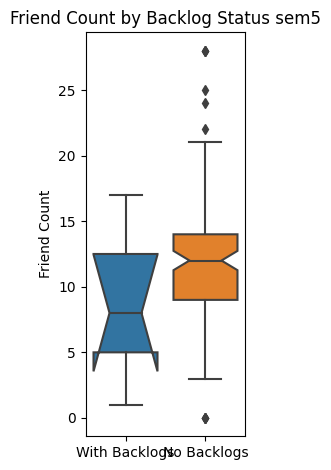

In [24]:
import seaborn as sns


friend_counts_backlogs_sem3 = sem3_data.loc[sem3_data['backlogs'] > 0, 'friend_count']
friend_counts_no_backlogs_sem3 = sem3_data.loc[sem3_data['backlogs'] == 0, 'friend_count']

friend_counts_backlogs_sem5 = sem5_data.loc[sem5_data['backlogs'] > 0, 'friend_count']
friend_counts_no_backlogs_sem5 = sem5_data.loc[sem5_data['backlogs'] == 0, 'friend_count']

friend_counts_backlogs_sem7 = sem7_data.loc[sem7_data['backlogs'] > 0, 'friend_count']
friend_counts_no_backlogs_sem7 = sem7_data.loc[sem7_data['backlogs'] == 0, 'friend_count']

plt.figure(figsize=(12, 4))

plt.subplot(1,3,1)
sns.boxplot(data=[friend_counts_backlogs_sem3, friend_counts_no_backlogs_sem3], notch=True)
plt.xticks([0, 1], ['With Backlogs', 'No Backlogs'])
plt.ylabel("Friend Count ")
plt.title("Friend Count by Backlog Status sem3")
plt.show()


plt.subplot(1,3,2)
sns.boxplot(data=[friend_counts_backlogs_sem5, friend_counts_no_backlogs_sem5], notch=True)
plt.xticks([0, 1], ['With Backlogs', 'No Backlogs'])
plt.ylabel("Friend Count")
plt.title("Friend Count by Backlog Status sem5")
plt.show()


plt.subplot(1,3,3)
sns.boxplot(data=[friend_counts_backlogs_sem7, friend_counts_no_backlogs_sem7], notch=True)
plt.xticks([0, 1], ['With Backlogs', 'No Backlogs'])
plt.ylabel("Friend Count")
plt.title("Friend Count by Backlog Status sem7")

plt.tight_layout()
plt.show()

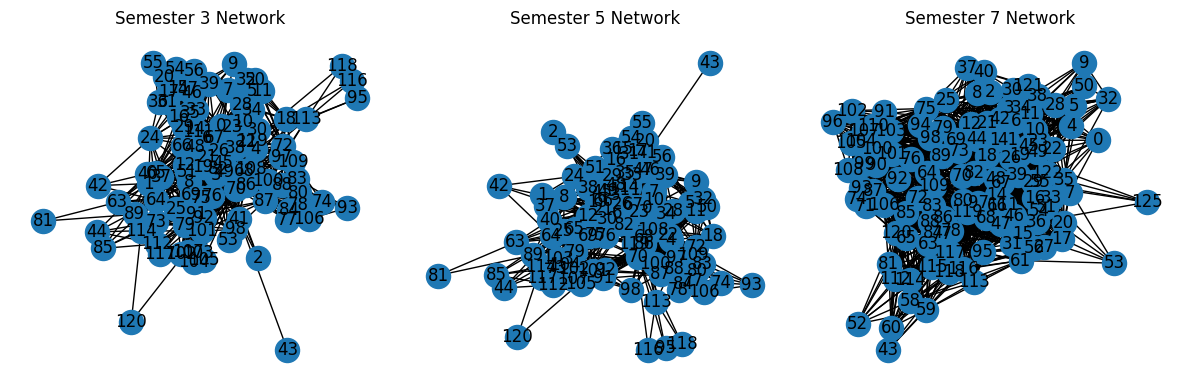

In [19]:
import networkx as nx
import matplotlib.pyplot as plt


G_sem3 = nx.Graph()
edges_sem3 = []
for friends_list in sem3_data['freinds']:
    friends = friends_list
    edges_sem3.extend([(friend, other_friend) for friend in friends for other_friend in friends if friend != other_friend])
G_sem3.add_edges_from(edges_sem3)

G_sem5 = nx.Graph()
edges_sem5 = []
for friends_list in sem5_data['freinds']:
    friends = friends_list
    edges_sem5.extend([(friend, other_friend) for friend in friends for other_friend in friends if friend != other_friend])
G_sem5.add_edges_from(edges_sem5)

G_sem7 = nx.Graph()
edges_sem7 = []
for friends_list in sem7_data['freinds']:
    friends = friends_list
    edges_sem7.extend([(friend, other_friend) for friend in friends for other_friend in friends if friend != other_friend])
G_sem7.add_edges_from(edges_sem7)


plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Semester 3 Network")
nx.draw(G_sem3, with_labels=True)

plt.subplot(1, 3, 2)
plt.title("Semester 5 Network")
nx.draw(G_sem5, with_labels=True)

plt.subplot(1, 3, 3)
plt.title("Semester 7 Network")
nx.draw(G_sem7, with_labels=True)

plt.tight_layout()
plt.show()

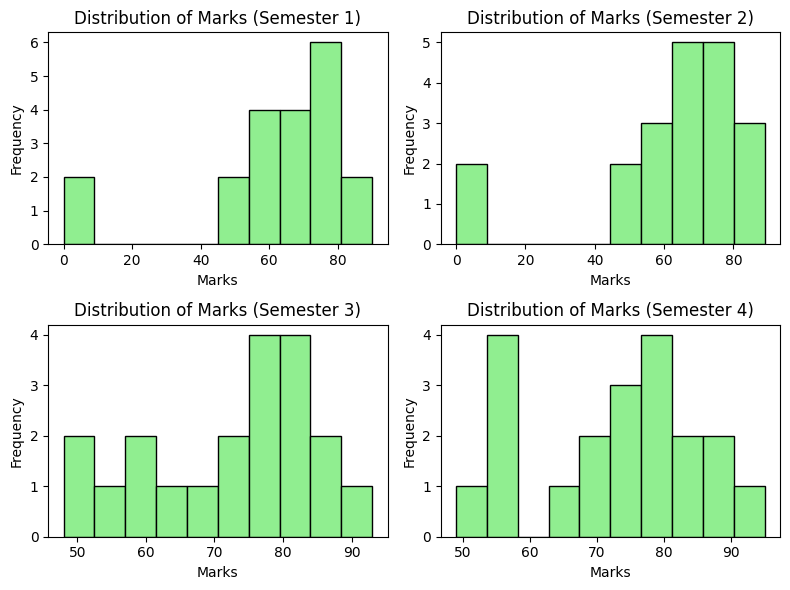

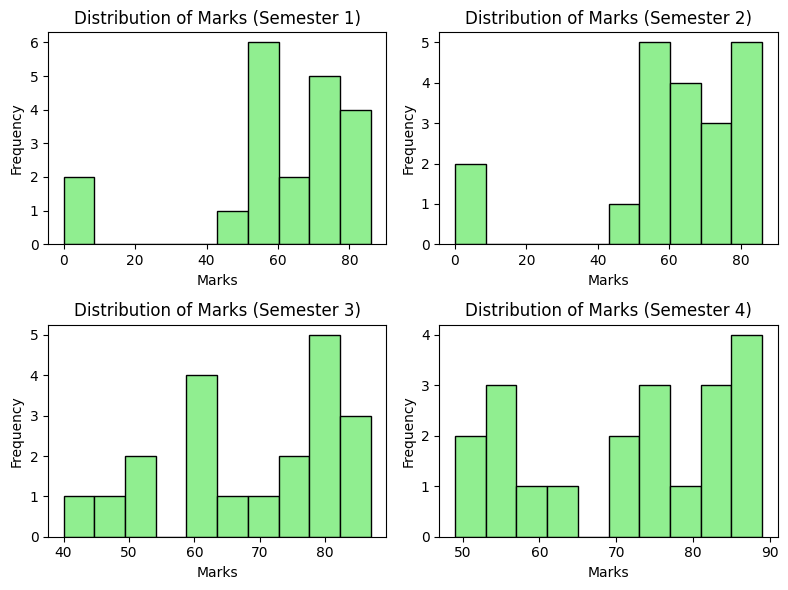

In [29]:
import matplotlib.pyplot as plt


def plot_densely_connected_students(sem_data, graph, semester):

    top_students = sorted(graph.nodes(), key=lambda x: graph.degree(x), reverse=True)[:20]
    
  
    marks = []
    for student in top_students:
        student_marks = [
            sem_data.loc[sem_data['Node ID'] == student, 'X1stSemPercentage'].values[0],
            sem_data.loc[sem_data['Node ID'] == student, 'X2ndSemPercentage'].values[0],
            sem_data.loc[sem_data['Node ID'] == student, 'X3rdSemPercentage'].values[0],
            sem_data.loc[sem_data['Node ID'] == student, 'X4thSemPercentage'].values[0]
        ]
        marks.append(student_marks)
    
    
    num_subplots = min(semester, 4)
    
  
    plt.figure(figsize=(8, 6))
    for i in range(semester):
        if i < num_subplots:
            plt.subplot(2, 2, i+1)
            plt.hist([marks[j][i] for j in range(len(top_students))], bins=10, color='lightgreen', edgecolor='black')
            plt.xlabel('Marks')
            plt.ylabel('Frequency')
            plt.title('Distribution of Marks (Semester {})'.format(i+1))
    
    plt.tight_layout()
    plt.show()


plot_densely_connected_students(sem5_data, G_sem5, 5)
plot_densely_connected_students(sem7_data, G_sem7, 7)